In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def compress(img, k):
    u, s, vh = np.linalg.svd(img, full_matrices=False)
    u = u[:, :k]
    s = s[:k]
    vh = vh[:k, :]
    orig_size = img.shape[0] * img.shape[1]
    new_size = u.shape[0] * u.shape[1] + s.shape[0] + vh.shape[0] * vh.shape[1]
    print(f"original_size: {orig_size}")
    print(f"new_size     : {new_size}")
    print(f"compressed by: {round((1 - (new_size / orig_size)) * 100, 2)}%")
    return u, s, vh
    
def decompress(u, s, vh):
    return u @ np.diag(s) @ vh

response = requests.get("https://i.stack.imgur.com/r597Y.png")
img = Image.open(BytesIO(response.content)).convert('L')
img = np.array(img)

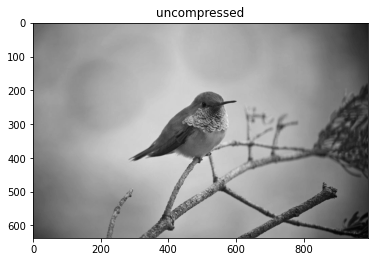

In [2]:
plt.imshow(img, cmap='gray')
plt.title("uncompressed")
plt.show()

In [3]:
u, s, vh = compress(img, 50)

original_size: 631267
new_size     : 81450
compressed by 87.1%


In [4]:
img = decompress(u, s, vh)

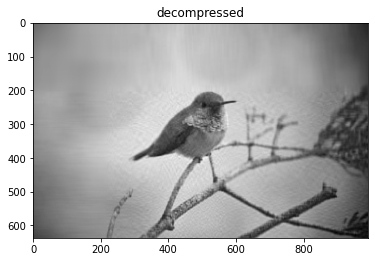

In [5]:
plt.imshow(img, cmap='gray')
plt.title("decompressed")
plt.show()